# Entrenamiento de modelo ML para predecir el precio de viviendas

In [3]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor

In [18]:
df = pd.read_csv("kc_house_data.csv")
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Variables por entrada que contiene el dataset:

* __Id__ = Identificador único de la vivienda.
* __date__ = Fecha en la que se vendió la vivienda.
* __price__ : Precio de la vivienda (variable objetivo).
* __bedrooms__: Número de dormitorios.
* __bathrooms__ : Número de baños.
* __sqft_living__: Superficie habitable en pies cuadrados.
* __sqft_lot__: Tamaño del lote en pies cuadrados.
* __floors__: Número de pisos en la vivienda.
* __waterfront__: Variable binaria que indica si la vivienda tiene vistas al agua.
* __view__: Calificación de la vista desde la vivienda.
* __condition__: Calificación de la condición de la vivienda.
* __grade__: Calificación general de la vivienda.
* __sqft_above__: Superficie habitable sobre el nivel del suelo en pies cuadrados.
* __sqft_basement__: Superficie habitable en el sótano en pies cuadrados.
* __yr_built__: Año de construcción de la vivienda.
* __yr_renovated__: Año de renovación de la vivienda.
* __zipcode__: Código postal de la ubicación de la vivienda.
* __lat__: Latitud de la ubicación de la vivienda.
* __long__: Longitud de la ubicación de la vivienda.
* __sqft_living15__: Superficie habitable promedio de las 15 viviendas más cercanas en pies cuadrados.
* __sqft_lot15__ : Tamaño del lote promedio de las 15 viviendas más cercanas en pies cuadrados.

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [84]:
# Se crea una copia del df original para realizar cambios temporales
df_temp = df.copy()

# Convierte la columna "date" a tipo de dato datetime
df_temp['date'] = pd.to_datetime(df_temp['date'])

# Extraer características de fecha
df_temp['year'] = df_temp['date'].dt.year
df_temp['month'] = df_temp['date'].dt.month

# Formatear la columna "date"
df_temp['date'] = df_temp['date'].dt.strftime('%Y-%m-%d')

df_temp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [85]:
df["price"].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

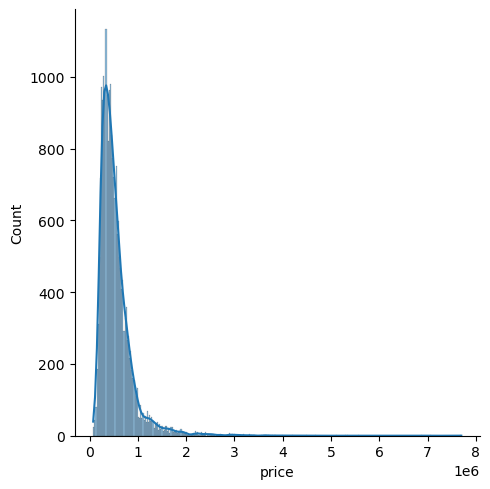

In [86]:
sns.displot(data=df, x="price", kde=True)

In [87]:
df_temp.drop(columns=["id", "date"], inplace=True)
df_temp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [88]:
df_temp.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [100]:
# Ordenar el DataFrame por la columna 'price' en orden descendente

df_temp = df_temp.sort_values(by='price', ascending=False)

df_temp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
7252,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014,10
3914,7062500.0,5,4.0,10040,37325,2.0,1,2,3,11,...,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014,6
9254,6885000.0,6,8.0,9890,31374,2.0,0,4,3,13,...,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014,9
4411,5570000.0,5,6.0,9200,35069,2.0,0,0,3,13,...,3000,2001,0,98039,47.6289,-122.233,3560,24345,2014,8
1448,5350000.0,5,5.0,8000,23985,2.0,0,4,3,12,...,1280,2009,0,98004,47.6232,-122.220,4600,21750,2015,4


In [89]:
# calcular la correlación entre cada variable del conjunto de datos y "price"

correlation_matrix = df_temp.corr()
correlation_with_price = correlation_matrix["price"].sort_values(ascending=False)
print(correlation_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
zipcode         -0.053203
Name: price, dtype: float64


### Observaciones de la correlación:

* __Fuerte Correlación Positiva__: tienden a aumentar su valor a medida que aumenta el precio. 

- __sqft_living__ (superficie habitable).
- __grade__ (calificación de calidad).
- __sqft_above__ (superficie sobre el nivel del suelo).
- __sqft_living15__ (superficie habitable promedio de vecinos).
- __bathrooms__ (número de baños).
- __view__ (vistas).

* __Correlación Negativa o Débil__: su valor tiende a disminuir a medida que aumenta el precio. 

- __zipcode__ (código postal). 
- __year__ (año de venta).

* __Variables Categóricas__: también tienen correlaciones significativas con el precio. Esto sugiere que estas variables categóricas pueden ser informativas para predecir el precio.

- __waterfront__ (vista al agua).
- __floors__ (número de pisos).

* __Geosespacial__: la ubicación geográfica puede influir en el precio de las viviendas.

- __lat__ (latitud). 
- __long__ (longitud).

In [90]:
# Calcular la relación entre el tamaño de la casa y el tamaño del lote
house_lot_ratio = df_temp['sqft_living'] / df_temp['sqft_lot']

print(house_lot_ratio)

0        0.208850
1        0.354874
2        0.077000
3        0.392000
4        0.207921
           ...   
21608    1.352785
21609    0.397385
21610    0.755556
21611    0.670017
21612    0.947955
Length: 21613, dtype: float64


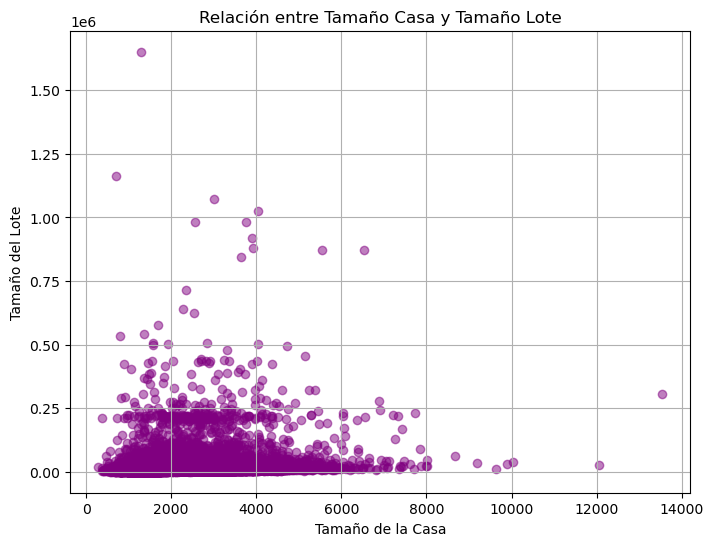

In [91]:
# Gráfico relación entre tamaño de casa y tamaño de lote

plt.figure(figsize=(8, 6))
plt.scatter(df_temp['sqft_living'], df_temp['sqft_lot'], alpha=0.5, color='purple')
plt.xlabel('Tamaño de la Casa')
plt.ylabel('Tamaño del Lote')
plt.title('Relación entre Tamaño Casa y Tamaño Lote')
plt.grid(True)
plt.show()

In [104]:
# Redondear los valores de la columna "bathrooms" y "floors" a números enteros
df_temp['bathrooms'] = df_temp['bathrooms'].round(0)
df_temp['floors'] = df_temp['floors'].round(0)

# Contar la cantidad de propiedades con x cantidad de baños
bathroom_counts = df_temp['bathrooms'].value_counts()

print(bathroom_counts)

bathrooms
2.0    13851
1.0     3933
3.0     2527
4.0     1201
5.0       57
6.0       24
0.0       14
8.0        4
7.0        2
Name: count, dtype: int64


In [127]:
# Filtrar el DataFrame para seleccionar solo las propiedades con 1 baño
propiedades_con_1_banos = df_temp[df_temp['bathrooms'] == 1]

# Calcular estadísticas resumidas sobre el precio de esas propiedades
estadisticas_precio = propiedades_con_1_banos['price'].describe()

propiedades_con_1_banos = propiedades_con_1_banos.sort_values(by='price', ascending=False)

estadisticas_precio.describe()

count    8.000000e+00
mean     3.684413e+05
std      4.354118e+05
min      3.933000e+03
25%      1.364175e+05
50%      2.750000e+05
75%      3.662804e+05
max      1.388000e+06
Name: price, dtype: float64